In [1]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df_churndata1 = pd.read_csv("TelcoCustomerChurn[MODIFIED].csv", index_col=0)
df_churndata1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0.115423,0.001275,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,1,1,...,1,0,0,0,1,0,1,0.385075,0.215867,0
2,3668-QPYBK,1,0,0,0,0.014085,1,0,1,1,...,0,0,0,0,0,1,1,0.354229,0.010310,1
3,7795-CFOCW,1,0,0,0,0.619718,0,0,1,1,...,1,1,0,0,1,0,0,0.239303,0.210241,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,1,0,...,0,0,0,0,0,1,0,0.521891,0.015330,1


In [3]:
# We store our churn column in a separate variable and drop it from dataset

churn = df_churndata1.pop('Churn')
churn[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [4]:
df_churndata1 = df_churndata1.drop(columns="customerID")

In [5]:
#split the data into training and testing

data_train, data_test, target_train, target_test = train_test_split(df_churndata1, churn, test_size = 0.25)

In [6]:
#Baseline tree classifier

tree_churn = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_churn.fit(data_train, target_train)
tree_churn.score(data_test, target_test)

0.7741751990898749

In [7]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, tree_churn.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0
SeniorCitizen -> 0.0005557149154629907
Partner -> 0.0
Dependents -> 0.0018743200663717285
tenure -> 0.18397716731786978
PhoneService -> 0.009781638323045079
MultipleLines -> 0.0
InternetService -> 0.016779432278356297
OnlineSecurity -> 0.0
OnlineBackup -> 0.0
DeviceProtection -> 0.0
TechSupport -> 0.009279096088287302
StreamingTV -> 0.00820800141073808
StreamingMovies -> 0.0036020413983268765
Contract -> 0.5366782328232483
PaperlessBilling -> 0.005456592645744544
PaymentMethod -> 0.0
MonthlyCharges -> 0.1808079219550066
TotalCharges -> 0.04299984077754243


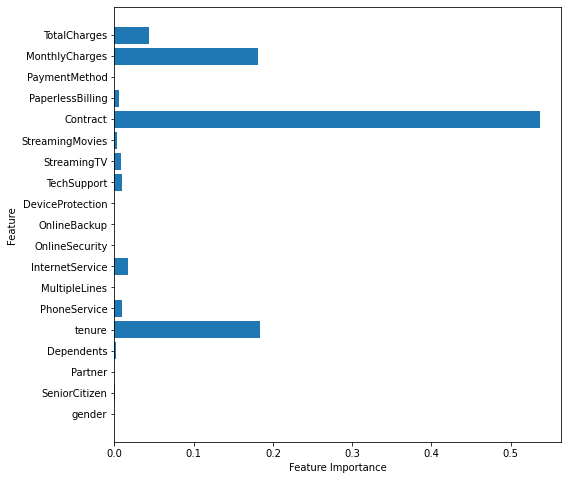

In [8]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_train.columns.values)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree_churn)

In [9]:
#prediction with basic tree

pred = tree_churn.predict(data_test)
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))


# The results will vary but I ran it once and got the below
#True positives = 1190
#True negatives = 209


#false positives = 112
#false negatiaves = 247

[[1193  106]
 [ 291  168]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1299
           1       0.61      0.37      0.46       459

    accuracy                           0.77      1758
   macro avg       0.71      0.64      0.66      1758
weighted avg       0.75      0.77      0.75      1758



In [10]:
churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [11]:
#bagged trees

bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth= 5), n_estimators=20)

In [12]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [13]:
bagged_tree.score(data_train, target_train)

0.8109594235874099

In [14]:
bagged_tree.score(data_test, target_test)

0.7810011376564278

In [34]:
#Random Forests

forest = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features=10)

In [35]:
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5, max_features=10, n_estimators=1000)

In [36]:
forest.score(data_train, target_train)

0.8083048919226393

In [37]:
forest.score(data_test, target_test)

0.7821387940841866

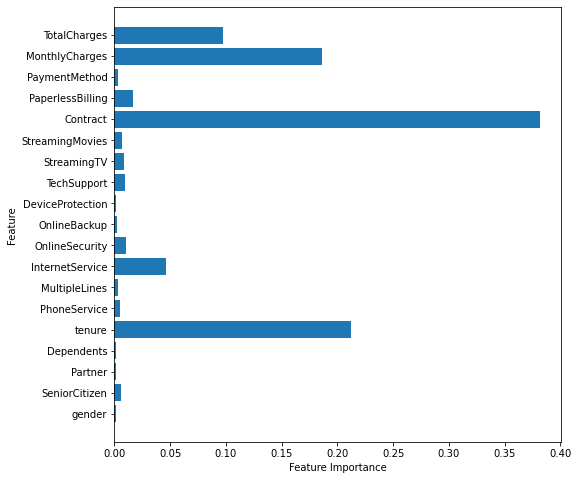

In [38]:
plot_feature_importances(forest)

In [39]:
#Baseline tree feature importance

for feature, importance in zip(df_churndata1.columns, forest.feature_importances_):
    print("{} -> {}".format(feature, importance))

gender -> 0.0009626895834315319
SeniorCitizen -> 0.005504228480816602
Partner -> 0.0012354275328767574
Dependents -> 0.001644358644058406
tenure -> 0.21240846907653477
PhoneService -> 0.00486975816595197
MultipleLines -> 0.0034659540467049292
InternetService -> 0.0460031752065921
OnlineSecurity -> 0.01080588079297863
OnlineBackup -> 0.0020725622338476617
DeviceProtection -> 0.0011501643138109013
TechSupport -> 0.009702109641497685
StreamingTV -> 0.008256865838846378
StreamingMovies -> 0.007190682459052374
Contract -> 0.3813412241352116
PaperlessBilling -> 0.01707662708753565
PaymentMethod -> 0.003268162117798798
MonthlyCharges -> 0.185779829925036
TotalCharges -> 0.09726183071741734


In [40]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(forest.feature_importances_,3)})

In [41]:
importances = importances.sort_values('importance',ascending=False).set_index('feature')

<AxesSubplot:xlabel='feature'>

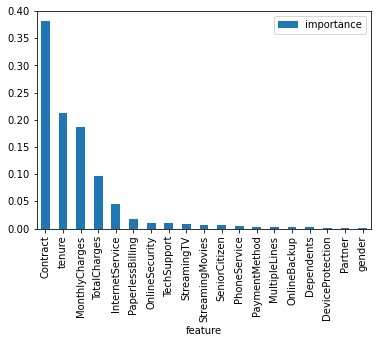

In [42]:
importances.plot.bar()

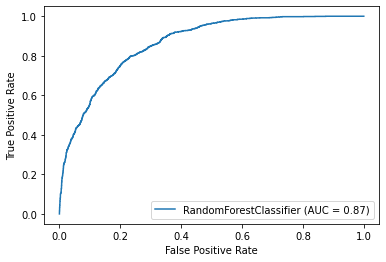

In [51]:
# plotting the ROC Curve

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plot_roc_curve(forest, data_train, target_train)

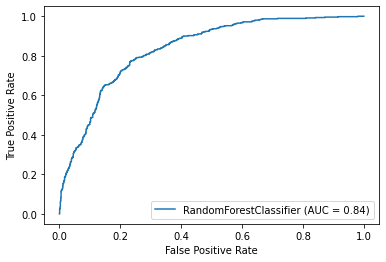

In [45]:
plot_roc_curve(forest, data_test, target_test)

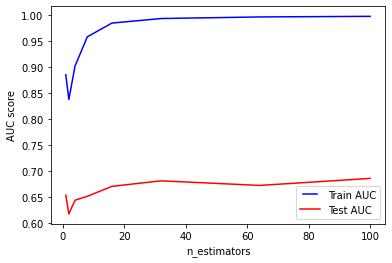

In [54]:
#num forests
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
# I removed 200, 500, 1000 because it was just leading to 1.00, maybe keep it in?
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [ ]:
#maxdepth
# max_depths = np.linspace(1, 32, 32, endpoint=True)
# train_results = []
# test_results = []
# for max_depth in max_depths:
#    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
#    rf.fit(x_train, y_train)
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(max_depths, train_results, ‘b’, label=”Train AUC”)
# line2, = plt.plot(max_depths, test_results, ‘r’, label=”Test AUC”)
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel(‘AUC score’)
# plt.xlabel(‘Tree depth’)
# plt.show()

In [ ]:
#nume_samples_split
# max_depths = np.linspace(1, 32, 32, endpoint=True)
# train_results = []
# test_results = []
# for max_depth in max_depths:
#    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
#    rf.fit(x_train, y_train)
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(max_depths, train_results, ‘b’, label=”Train AUC”)
# line2, = plt.plot(max_depths, test_results, ‘r’, label=”Test AUC”)
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel(‘AUC score’)
# plt.xlabel(‘Tree depth’)
# plt.show()

In [ ]:
#maxleaves
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
# train_results = []
# test_results = []
# for min_samples_leaf in min_samples_leafs:
#    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
#    rf.fit(x_train, y_train)
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(min_samples_leafs, train_results, ‘b’, label=”Train AUC”)
# line2, = plt.plot(min_samples_leafs, test_results, ‘r’, label=”Test AUC”)
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel(‘AUC score’)
# plt.xlabel(‘min samples leaf’)
# plt.show()

In [ ]:
#maxfeatures
# max_features = list(range(1,train.shape[1]))
# train_results = []
# test_results = []
# for max_feature in max_features:
#    rf = RandomForestClassifier(max_features=max_feature)
#    rf.fit(x_train, y_train)
#    train_pred = rf.predict(x_train)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    train_results.append(roc_auc)
#    y_pred = rf.predict(x_test)
#    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#    roc_auc = auc(false_positive_rate, true_positive_rate)
#    test_results.append(roc_auc)
# from matplotlib.legend_handler import HandlerLine2D
# line1, = plt.plot(max_features, train_results, ‘b’, label=”Train AUC”)
# line2, = plt.plot(max_features, test_results, ‘r’, label=”Test AUC”)
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
# plt.ylabel(‘AUC score’)
# plt.xlabel(‘max features’)
# plt.show()